# Random Forest

## 1. Importar paquetes y librerías

In [1]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import ensemble
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

### Importar datos

In [2]:
loc=r"../interacciones_mensuales.csv"
data=pd.read_csv(loc,encoding="latin1",index_col=False,decimal=",",engine="python")
data = data.drop(data.columns[-20:], axis=1)

data=data[((data.Total-data.Total.mean()) / data.Total.std()).abs() <3]

X = data.drop(["Total","Year","Cod",'P_days'],axis=1) # Asignar variables independientes
nombres = data.drop(["Total","Year","Cod",'P_days'],axis=1).columns # Nombre de las variables dependientes
y = data['Total'] # Asignar variable dependiente

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 2. Entrenar modelos

In [3]:
R2 = []
modelist = [0]
best_R = []
best_MAE = []
best_RMSE = []
best_CRM = []
pred=[0]
obs=[0]
m = []

for i in range(100):
    nTreeList = range(50,950,10)
    
    R_2 = []
    MAE = []
    RMSE = []
    CRM = []
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5311)
    
    for iTrees in nTreeList:
        depth = None
        maxFeat = 4
        cacaoRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat, oob_score=False)
        cacaoRFModel.fit(X_train,y_train)
    
        # MSE acumulado
        prediction = cacaoRFModel.predict(X_test)
        r2= r2_score(y_test,prediction)
        #mseOos.append(mean_squared_error(y_test,prediction))
        R_2.append(r2)
        m.append(r2)
        MAE.append(median_absolute_error(y_test,prediction))
        RMSE.append(np.linalg.norm((y_test-prediction),2)/np.sqrt(len(y_test)))
        CRM.append((sum(y_test)-sum(prediction))/sum(y_test))
        
        if r2 >= max(m):
            pred[0] = (cacaoRFModel.predict(X_test))
            obs[0] = (y_test)
            X_Test = X_test
            y_Test = y_test
            R2 = R_2
            modelist[0] = cacaoRFModel.feature_importances_
            model = cacaoRFModel
            
    best_R.append(max(R_2))
    best_MAE.append((MAE[R_2.index(max(R_2))],R_2.index(max(R_2))))
    best_RMSE.append((RMSE[R_2.index(max(R_2))],R_2.index(max(R_2))))
    best_CRM.append(CRM[R_2.index(max(R_2))])
        
#print("MSE %.4f" %(mseOos[-1]))

In [4]:
MAE = 0
RMSE = 0
for i in range(len(best_R)):
    MAE += best_MAE[i][0]
    RMSE += best_RMSE[i][0]

print("R^2 medio: %.4f" % (np.mean(best_R)))
print("RMSE medio: %.2f" % (RMSE/len(best_R)))
print("MAE medio: %.4f" % (MAE/len(best_R)))
print("CRM: %.4f" % (np.mean(best_CRM)))

R^2 medio: 0.4426
RMSE medio: 26.64
MAE medio: 14.5706
CRM: -0.1110


In [5]:
# Mejor desempeño

print("Mejor R: %.4f" % (max(best_R)))
print("Mejor RMSE: %.2f con %s arboles" % (best_RMSE[best_R.index(max(best_R))]))
print("Mejor MAE: %.2f con %s arboles" % (best_MAE[best_R.index(max(best_R))]))
print("Mejor CRM: %.4f" % (best_CRM[best_R.index(max(best_R))]))

Mejor R: 0.4663
Mejor RMSE: 26.07 con 1 arboles
Mejor MAE: 15.60 con 1 arboles
Mejor CRM: -0.0920


In [6]:
# Guardar los valores de las métricas
pd.DataFrame([best_R,best_MAE],index=["R^2","MAE"]).T.to_csv("Ajustes Random_.csv",decimal=",")

In [7]:
max(best_R), min(best_R), np.std(best_R), np.mean(best_R)

(0.46625183769244205,
 0.4267196383806108,
 0.008477602538517693,
 0.4426133318128675)

## Gráficas

In [8]:
import seaborn as sns
sns.set()

<Figure size 432x288 with 0 Axes>

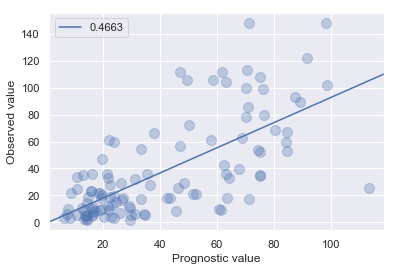

In [9]:
obs,pred = np.array(obs).flatten(), np.array(pred).flatten() 

plt.figure("Diagrama de dispersión")
fig,ax=plt.subplots()
ax.scatter(pred,obs,s=100,alpha=0.3,c="b")
line_fit=sm.OLS(obs,sm.add_constant(pred,prepend=True)).fit()
abline_plot(model_results=line_fit,ax=ax,c="b",label=round(r2_score(obs,pred),4))
plt.xlabel("Prognostic value")
plt.ylabel("Observed value")
plt.legend();

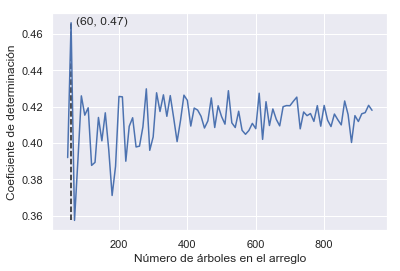

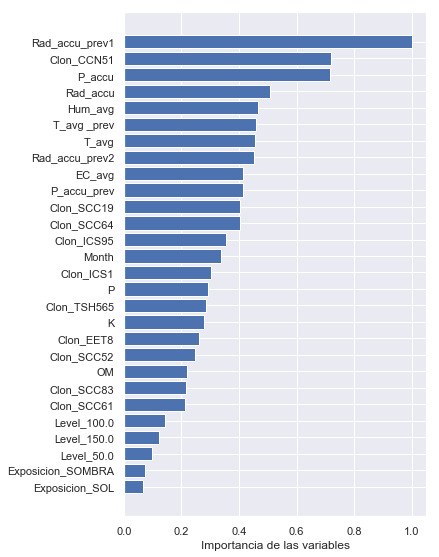

In [10]:
plt.plot(nTreeList, R2)
plt.vlines(nTreeList[R2.index(max(R2))],ymin=min(R2),ymax=max(R2),linestyle="--")
plt.xlabel("Número de árboles en el arreglo")
plt.ylabel("Coeficiente de determinación")
plt.axis("tight")
plt.text(nTreeList[R2.index(max(R2))] + 15,max(R2)-0.001,str((nTreeList[R2.index(max(R2))],round(max(R2),2))))
plt.savefig("Random ajuste.jpg", dpi=600)
plt.show()

featureImportance = modelist[0]

featureImportance = featureImportance / featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(barPos, featureImportance[sorted_idx], align ="center")
plt.yticks(barPos,nombres[sorted_idx])
plt.xlabel("Importancia de las variables")

plt.subplots_adjust(left=0.2,right=0.9,top=1.8,bottom=0.05);

## Estrategia de oscilación

In [11]:
var = ['T_avg','T_avg _prev',"P_accu", "P_accu_prev","Rad_accu","Rad_accu_prev1","Rad_accu_prev2","Hum_avg","EC_avg"]

In [12]:
predictores = nombres
X_ = pd.DataFrame(X_Test,columns=nombres)
y = y_Test

In [13]:
R_2 = []
RMSE = []
MAE = []
pre = []
rango = []

for i in var:
        
    X = X_.copy()
    promedio = []
    
    for j in np.linspace(X[i].min(), X[i].max(),100):
        
        X[i] = j
    
        r_2 = r2_score(y, model.predict(X))
        prediction = model.predict(X)
        
        pre.append(np.mean(prediction))
        promedio.append(np.mean(prediction))
        R_2.append(r_2)
        RMSE.append(np.linalg.norm((y-prediction),2)/np.sqrt(len(y)))
        MAE.append(median_absolute_error(y,prediction))
    
    rango.append(max(promedio)-min(promedio))

In [14]:
dic = {}

for i in var:
    if i not in dic:
        dic[i] = np.linspace(X_[i].min(), X_[i].max(),100)

RMSE_1 = RMSE[:100]
RMSE_2 = RMSE[100:200]
RMSE_3 = RMSE[200:300]
RMSE_4 = RMSE[300:400]
RMSE_5 = RMSE[400:500]
RMSE_6 = RMSE[500:600]
RMSE_7 = RMSE[600:700]
RMSE_8 = RMSE[-100:]

PRE_1 = pre[:100]
PRE_2 = pre[100:200]
PRE_3 = pre[200:300]
PRE_4 = pre[300:400]
PRE_5 = pre[400:500]
PRE_6 = pre[500:600]
PRE_7 = pre[600:700]
PRE_8 = pre[-100:]

In [15]:
pde = pd.DataFrame(dic)
pde["RMSE_1"],pde["RMSE_2"],pde["RMSE_3"],pde["RMSE_4"],pde["RMSE_5"],pde["RMSE_6"],pde["RMSE_7"],pde["RMSE_8"] = RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8
pde["PRE_1"],pde["PRE_2"],pde["PRE_3"],pde["PRE_4"],pde["PRE_5"],pde["PRE_6"],pde["PRE_7"],pde["PRE_8"] = PRE_1,PRE_2,PRE_3,PRE_4,PRE_5,PRE_6,PRE_7,PRE_8
pde.to_csv("Evaluación_RF.csv",decimal=",")

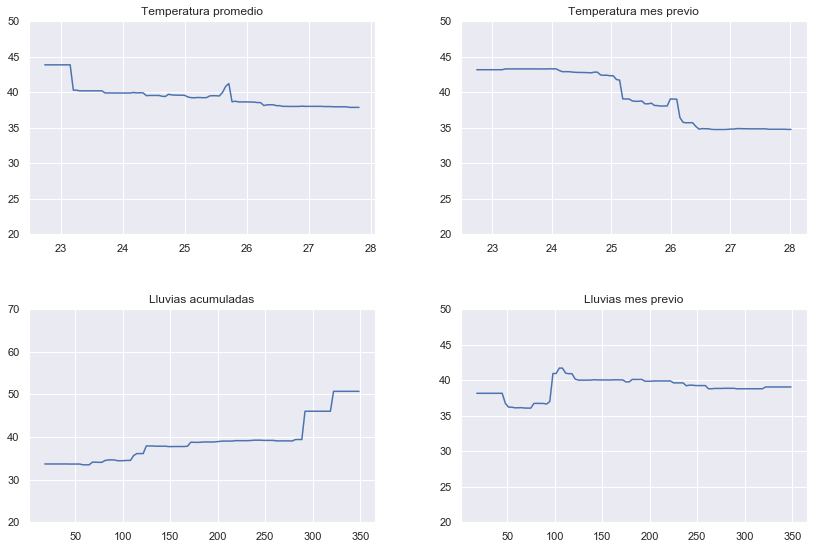

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.ylim(20,50)
plt.title("Temperatura promedio")
plt.plot(pde.T_avg,pde.PRE_1)

plt.subplot(2,2,2)
plt.ylim(20,50)
plt.title("Temperatura mes previo")
plt.plot(pde['T_avg _prev'],pde.PRE_2)

plt.subplot(2,2,3)
plt.ylim(20,70)
plt.title("Lluvias acumuladas")
plt.plot(pde.P_accu,pde.PRE_3)

plt.subplot(2,2,4)
plt.ylim(20,50)
plt.title("Lluvias mes previo")
plt.plot(pde.P_accu_prev,pde.PRE_4)

plt.subplots_adjust(top=0.92,bottom=0.05,left=0.05,right=0.95,
                   hspace=0.35,wspace=0.25)

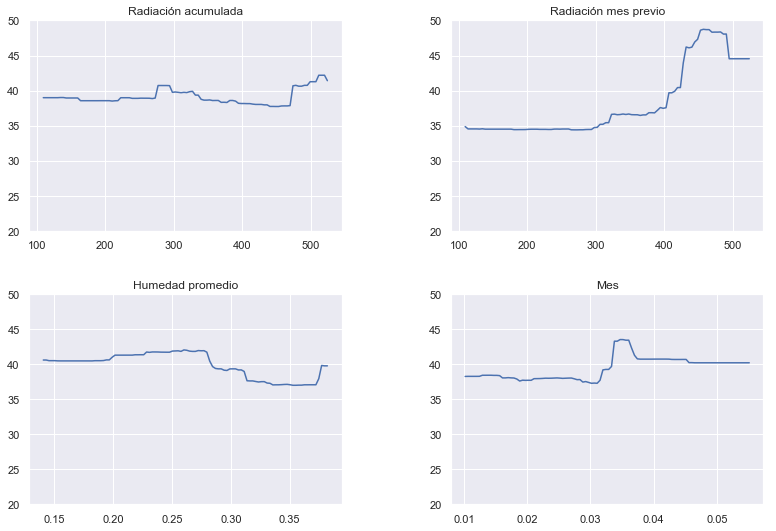

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.ylim(20,50)
plt.title("Radiación acumulada")
plt.plot(pde.Rad_accu,pde.PRE_5)

plt.subplot(2,2,2)
plt.ylim(20,50)
plt.title("Radiación mes previo")
plt.plot(pde.Rad_accu_prev1,pde.PRE_6)

plt.subplot(2,2,3)
plt.ylim(20,50)
plt.title("Humedad promedio")
plt.plot(pde.Hum_avg,pde.PRE_7)

plt.subplot(2,2,4)
plt.ylim(20,50)
plt.title("Mes")
plt.plot(pde.EC_avg,pde.PRE_8)

plt.subplots_adjust(top=0.92,bottom=0.08,left=0.1,right=0.95,
                   hspace=0.3,wspace=0.35)

In [18]:
new_dic ={}
for i,j in enumerate(var):
    if j not in new_dic:
        new_dic[j]=round(rango[i]/sum(rango),2)

pd.DataFrame(new_dic,index=np.linspace(0,1,1)).T

,0.0
T_avg,0.08
T_avg _prev,0.11
P_accu,0.23
P_accu_prev,0.07
Rad_accu,0.06
Rad_accu_prev1,0.19
Rad_accu_prev2,0.07
Hum_avg,0.11
EC_avg,0.08


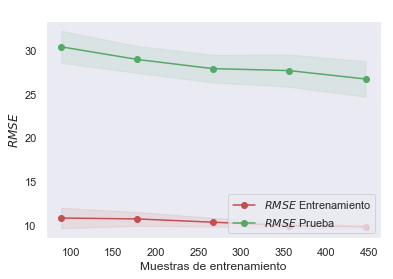

In [23]:
import Curva

X=data.drop(["Total","Year","Cod",'P_days'],axis=1).values # Asignar variables independientes
y=data['Total'].values # Asignar variable dependiente

# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)

title = " "

cv = ShuffleSplit(n_splits=10, test_size=0.2)
estimator = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat, oob_score=False)

Curva.plot_learning_curve(estimator, title, X_scaled, y, cv=cv, n_jobs=4)
plt.savefig("LC RF.jpg",dpi=600);